## Test prior extend value

In [46]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from PIL import Image
import os


In [47]:
EXTEND = 100 
SLOPE = 10

Text(0.5, 0, 'x')

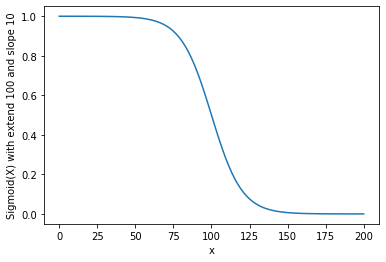

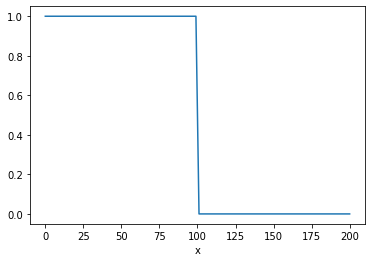

In [48]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
x = np.linspace(0, EXTEND * 2, 100)
y = sigmoid((-x + EXTEND)/ SLOPE)
y2 = (EXTEND - x) > 0 

plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel(f"Sigmoid(X) with extend {EXTEND} and slope {SLOPE}")

plt.figure()
plt.plot(x, y2)
plt.xlabel("x")

In [49]:
def vectorized_distance(A, p):
    H,W = A.shape
    px, py = p
    X,Y = np.ix_(np.arange(H),np.arange(W))
    return np.sqrt((X-px)**2 + (Y-py)**2)

In [59]:
ind = ([0,80,120], [2, 250, 250], [0, 35, 100], [3, 0, 250], [5, 10, 50],  [4, 10, 20])

In [60]:
mask = np.ones((6, 350, 350)) * -np.infty

In [61]:
for i in ind:
    p = i[1:]
    s = i[0]
    print(f'slice {s}, add point {p}')
    mask[s, :, :] = np.maximum(mask[s, :, :], vectorized_distance(mask[s, :, :], p)) 

print(mask[0,:5,:5])

#mask = ((-1) * mask + EXTEND) / SLOPE
mask = (-1) * mask + EXTEND  > 0

#mask = sigmoid(mask)

slice 0, add point [80, 120]
slice 2, add point [250, 250]
slice 0, add point [35, 100]
slice 3, add point [0, 250]
slice 5, add point [10, 50]
slice 4, add point [10, 20]
[[144.22205102 143.39107364 142.5622671  141.73566947 140.91131963]
 [143.66976021 142.8355698  142.00352108 141.17365193 140.34600101]
 [143.1223253  142.28492541 141.44963768 140.61649974 139.78555004]
 [142.57980222 141.73919712 140.90067424 140.06427096 139.2300255 ]
 [142.04224724 141.19844192 140.35668848 139.51702405 138.67948659]]


<Figure size 432x288 with 0 Axes>

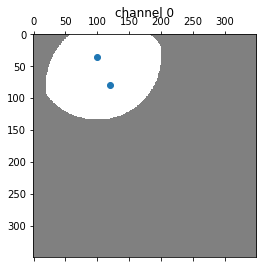

<Figure size 432x288 with 0 Axes>

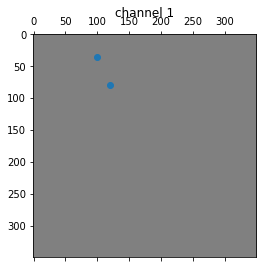

<Figure size 432x288 with 0 Axes>

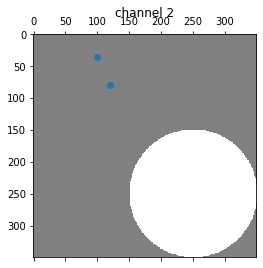

<Figure size 432x288 with 0 Axes>

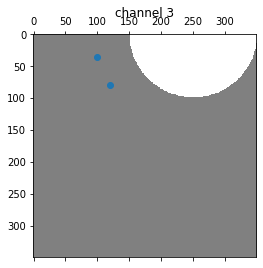

<Figure size 432x288 with 0 Axes>

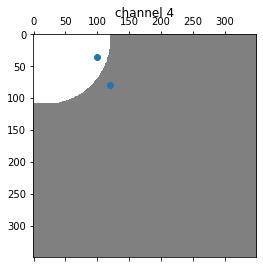

<Figure size 432x288 with 0 Axes>

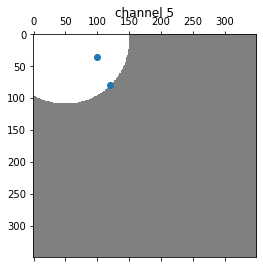

In [65]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['grey', 'w'])

for i in range(mask.shape[0]):
    plt.figure()
    plt.matshow(mask[i, :, :], interpolation='nearest', cmap=cmap)
    plt.title(f'channel {i}')
    plt.scatter(y = [80, 35], x = [120, 100])

<Figure size 432x288 with 0 Axes>

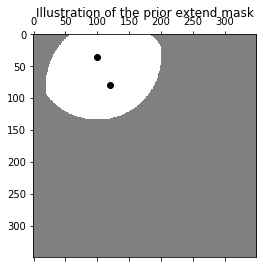

In [67]:
import tikzplotlib

plt.figure()
plt.matshow(mask[0, :, :], interpolation='nearest', cmap=cmap)
plt.scatter(y = [80, 35], x = [120, 100], c='k')

plt.savefig('prior_extend.png')
tikzplotlib.save('prior_extend.tex', axis_width ='5cm', axis_height ='5cm')

In [64]:
m = mask[0]
m

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [56]:
dist = vectorized_distance(m, p)

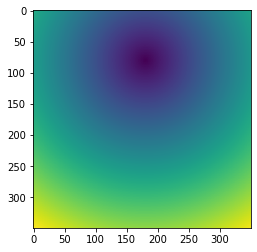

In [57]:
plt.imshow(dist, interpolation='nearest')
plt.show()

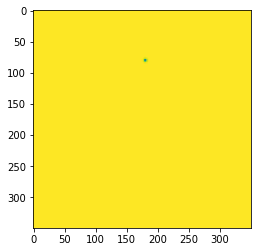

In [58]:
plt.imshow(sigmoid(dist), interpolation='nearest')
plt.show()